## Ordinary Differential Equations (ODEs)

In [1]:
# Import numpy and matplotlib, and use jupyter magic to
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
# Get nicer looking plots than default
plt.style.use('bmh')
# Timer to measure the performance of methods
from time import time
from scipy.integrate import odeint

Runge-Kutta, steps:  7540 time:  1.734687089920044
Forward Euler, steps:  7540 time:  0.33908510208129883


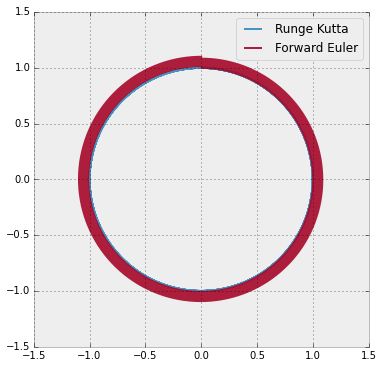

In [19]:
## Example problem: Circular orbit in magnetic field

def B(t, x):
    #return x[1]**2*np.array([0., 0., 1.])
    return np.array([0., 0., 1.])

def f(t, y, z):
    return z

def g(t, y, z):
    q = 1
    m = 1
    return q*np.cross(z, B(t, y))/m

def forwardEuler(h, t, y, z, f, g):
    k1 = f(t, y, z)
    l1 = g(t, y, z)
    y_new = y + h*k1
    z_new = z + h*l1
    return y_new, z_new

def rungeKutta(h, t, y, z, f, g):
    k1 = f(t, y, z)
    l1 = g(t, y, z)
    k2 = f(t + h/2, y+h*k1/2, z+h*l1/2)
    l2 = g(t + h/2, y+h*k1/2, z+h*l1/2)
    k3 = f(t + h/2, y+h*k2/2, z+h*l2/2)
    l3 = g(t + h/2, y+h*k2/2, z+h*l2/2)
    k4 = f(t + h,   y+h*k3,   z+h*l3)
    l4 = g(t + h,   y+h*k3,   z+h*l3)
    y_new = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    z_new = z + h*(l1 + 2*l2 + 2*l3 + l4)/6
    return y_new, z_new

def integrate(Tmax, h, integrator):
    T  = np.arange(0, Tmax, h)
    X  = np.zeros((len(T), 3))
    V  = np.zeros((len(T), 3))
    # Initial values
    x  = np.array([0., 1., 0.])
    v  = np.array([1., 0., 0.])
    # Mapping to new variables, y and z:
    # y = x
    # z = v
    for i in range(len(T)):
        t = i*h
        x, v = integrator(h, t, x, v, f, g)
        X[i, :] = x[:]
        V[i, :] = v[:]
    return T, X, V
    
Tmax = 12*np.pi
h    = 5e-3
plt.figure(figsize = (6,6))

linewidth = 2
alpha = 0.9

tic = time()
Tr, Xr, Vr = integrate(Tmax, h, rungeKutta)
plt.plot(Xr[:,0], Xr[:,1], label = 'Runge Kutta', lw = linewidth, alpha = alpha)
toc = time()
print('Runge-Kutta, steps: ', len(Tr), 'time: ', toc - tic)

tic = time()
Te, Xe, Ve = integrate(Tmax, h, forwardEuler)
plt.plot(Xe[:,0], Xe[:,1], label = 'Forward Euler', lw = linewidth, alpha = alpha)
toc = time()
print('Forward Euler, steps: ', len(Te), 'time: ', toc - tic)

plt.legend(loc = 'best')

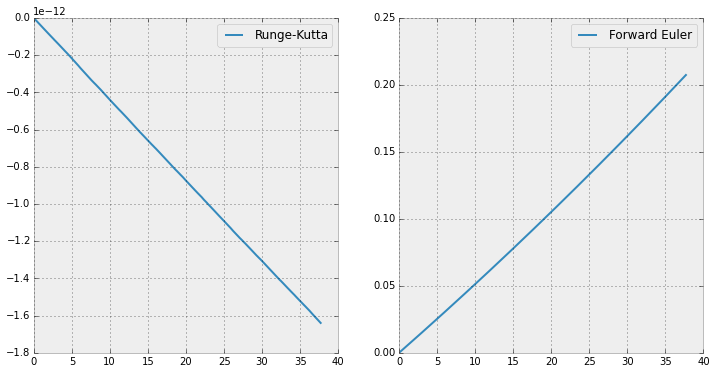

In [18]:
# Check conservation of energy
# Plot Ek(t)/Ek(t=0) - 1

def Ek(V):
    return 0.5*(V[:,0]**2+V[:,1]**2+V[:,2]**2)

Ek0 = 0.5

fig, ax = plt.subplots(1, 2, figsize = (12, 6))
for i, (V, T, label) in enumerate([(Vr, Tr, 'Runge-Kutta'), (Ve, Te, 'Forward Euler')]):
    ax[i].plot(T, Ek(V)/Ek0-1, label = label)
    ax[i].legend()